# Group 5 - Final Report
### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [2]:
#Libraries Imported
import pandas as pd
import numpy as np


### EDA - Data Loading

In [3]:
df_test=pd.read_csv(
    'C:/Users/Noela_tm/6000/eai6000_group5/Data/fraudTest.csv')
df_train=pd.read_csv(
    'C:/Users/Noela_tm/6000/eai6000_group5/Data/fraudTrain.csv')  

fraud_df= df_test.append(df_train)
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### EDA - Data Preprocessing

In [4]:
# Checking for missing values
fraud_df.isnull().any().sum()

0

In [5]:
fraud_df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [6]:
fraud_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

### EDA - Column Exploration

Text(0, 0.5, 'Volume')

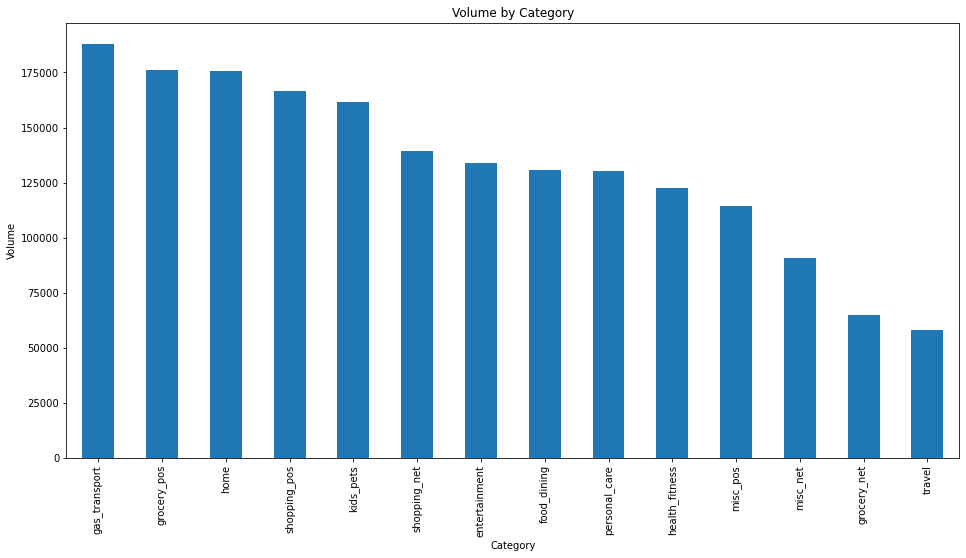

In [7]:
plt = pd.value_counts(fraud_df['category']).plot.bar(figsize=(16, 8), title="Volume by Category")
plt.set_xlabel('Category')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

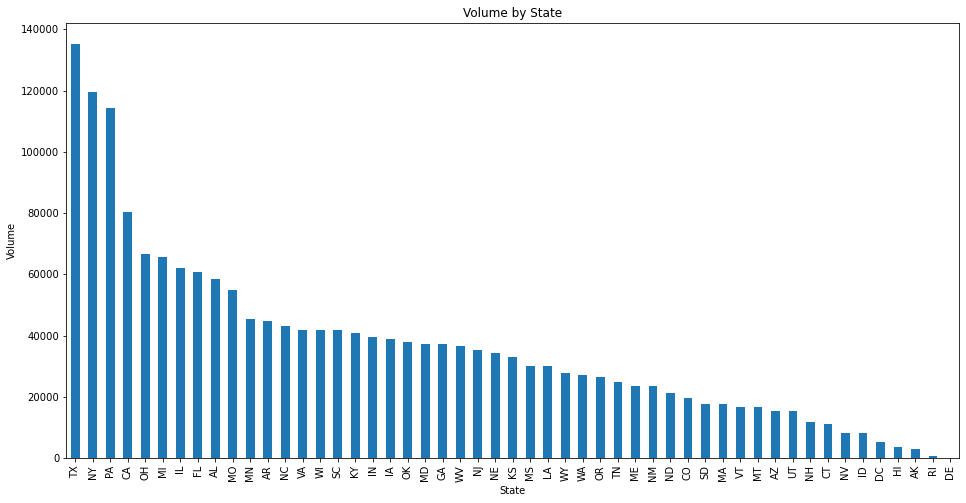

In [8]:
plt = pd.value_counts(fraud_df['state']).plot.bar(figsize=(16, 8), title="Volume by State")
plt.set_xlabel('State')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

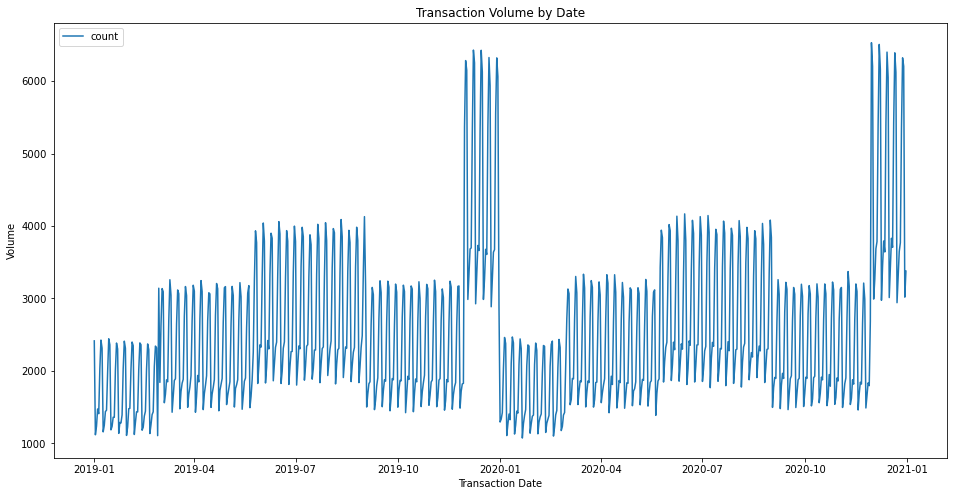

In [9]:
fraud_df['txn_datetime'] =  pd.to_datetime(fraud_df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

fraud_df['date_of_birth'] =  pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')
fraud_df['year_of_birth'] = fraud_df['date_of_birth'].dt.year
fraud_df['date_of_birth'] = fraud_df['date_of_birth'].dt.date

fraud_df['txn_date'] = fraud_df['txn_datetime'].dt.date
txn_count_by_date = fraud_df['txn_date'].value_counts().sort_index().reset_index()
txn_count_by_date.columns = ['txn_date','count']
plt = txn_count_by_date.plot.line(x='txn_date', y='count', figsize=(16, 8), title="Transaction Volume by Date")
plt.set_xlabel('Transaction Date')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Count')

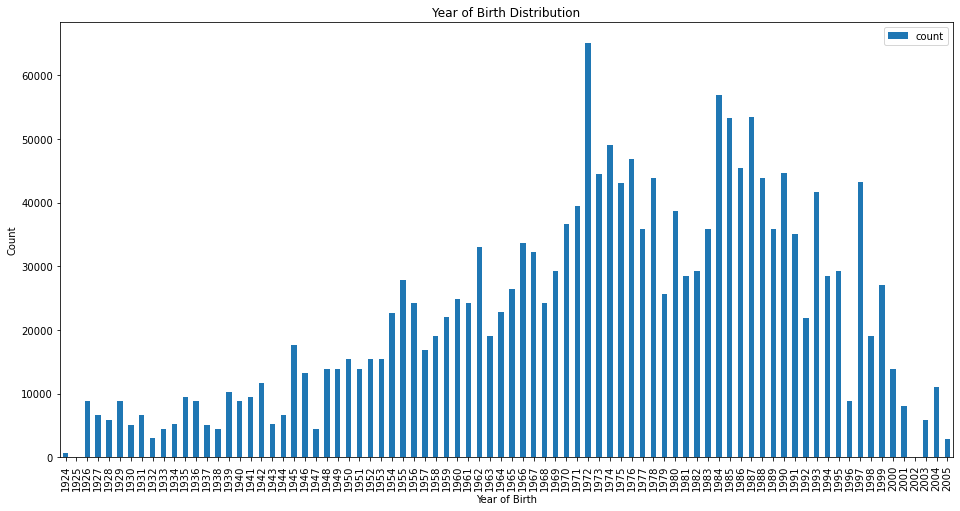

In [10]:
dob_counts = fraud_df['year_of_birth'].value_counts().sort_index().reset_index()
dob_counts.columns = ['year_of_birth','count']

plt = dob_counts.plot.bar(x='year_of_birth', y='count', figsize=(16, 8), title="Year of Birth Distribution")
plt.set_xlabel('Year of Birth')
plt.set_ylabel('Count')

In [11]:
# Number of merchants in the dataset

print(f"Number of merchants: {fraud_df['merchant'].nunique()}")

# Number of cards in the dataset

print(f"Number of cards: {fraud_df['cc_num'].nunique()}")

# Number of cards in the dataset

print(f"Number of unique users: {fraud_df.groupby(['first', 'last', 'gender', 'street', 'city']).ngroups}")


Number of merchants: 693
Number of cards: 999
Number of unique users: 999


Text(0, 0.5, 'Volume')

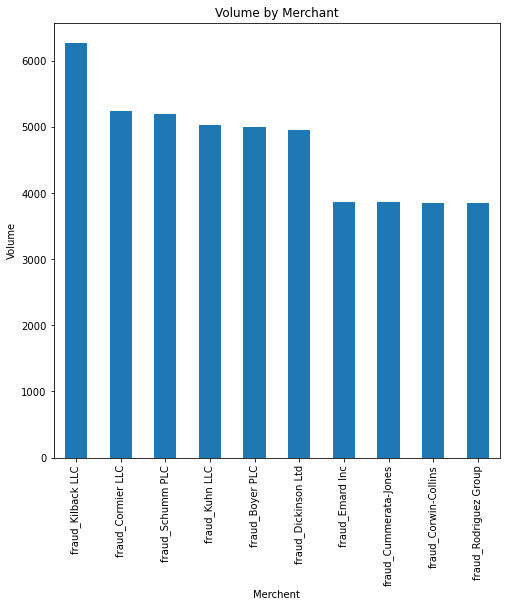

In [12]:
plt = pd.value_counts(fraud_df['merchant']).nlargest(10).plot.bar(figsize=(8, 8), title="Volume by Merchant")
plt.set_xlabel('Merchent')
plt.set_ylabel('Volume')

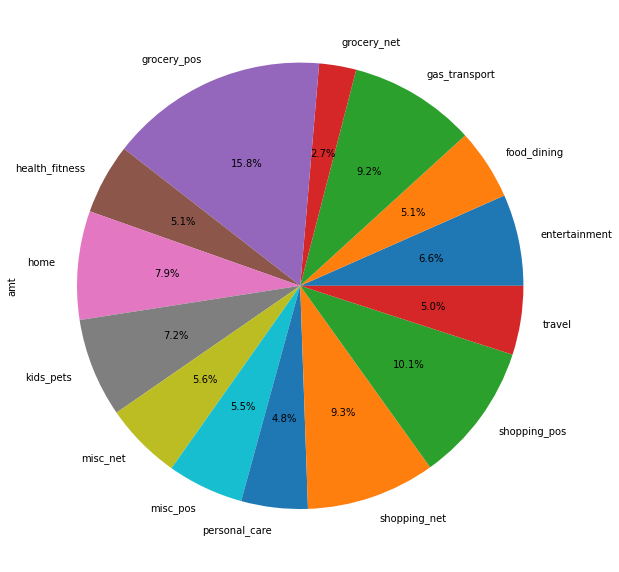

In [13]:
category_amt = fraud_df.groupby("category")["amt"].sum()
category_amt.plot.pie(autopct="%.1f%%", figsize=(10, 12))

### EDA - Special Features Engineering

In [14]:
from datetime import date
import geopy.distance

from math import sin, cos, sqrt, atan2, radians, log

#### Calculating Age from Date of Birth Column 

In [15]:
#Calculate Age
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

if 'dob' in fraud_df.columns:
    fraud_df['age'] = [calculate_age(d) for d in pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')]

#### Calculating Distance between card holder and merchant

In [16]:
def calculate_distance(row):
    coords_1 = (row['lat'], row['long'])
    coords_2 = (row['merch_lat'], row['merch_long'])
    return geopy.distance.geodesic(coords_1, coords_2).km

# Answer from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
# The answers above are based on the Haversine formula, which assumes the earth is a sphere,
# which results in errors of up to about 0.5% (according to help(geopy.distance)). 
# Vincenty distance uses more accurate ellipsoidal models such as WGS-84, and is implemented in geopy. For example,
def calculate_distance2(row):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(row['lat'])
    lon1 = radians(row['long'])
    lat2 = radians(row['merch_lat'])
    lon2 = radians(row['merch_long'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    print(distance)
    
if set(['lat', 'long', 'merch_lat', 'merch_long']).issubset(set(fraud_df.columns)):
     fraud_df['distance'] = [calculate_distance(row) for _, row in fraud_df.iterrows()]

#### Separating Time Buckets from Datetime Column

In [17]:
fraud_df['hour'] = fraud_df['txn_datetime'].dt.hour
fraud_df['day'] = fraud_df['txn_datetime'].dt.day
fraud_df['month'] = fraud_df['txn_datetime'].dt.month
fraud_df['year'] = fraud_df['txn_datetime'].dt.year

#### Removing Columns used to derive new features

In [18]:
fraud_df.drop([
    'Unnamed: 0',
    'trans_num',
    'unix_time',
    'first',
    'last',
    'street',
    'city',
    'state',
    'zip',
    'dob',
    'trans_date_trans_time',
    'lat',
    'long',
    'merch_lat',
    'merch_long'
], axis=1, errors='ignore', inplace=True)

cols = list(fraud_df.columns)
cols.insert(0, cols.pop(cols.index("txn_datetime")))
cols.append(cols.pop(cols.index('is_fraud')))
fraud_df = fraud_df[cols]

fraud_df.head()

,txn_datetime,cc_num,merchant,category,amt,gender,city_pop,job,date_of_birth,year_of_birth,txn_date,age,distance,hour,day,month,year,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,333497,Mechanical engineer,1968-03-19,1968,2020-06-21,52,24.613746,12,21,6,2020,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,302,"Sales professional, IT",1990-01-17,1990,2020-06-21,30,104.834043,12,21,6,2020,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,34496,"Librarian, public",1970-10-21,1970,2020-06-21,50,59.204796,12,21,6,2020,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,54767,Set designer,1987-07-25,1987,2020-06-21,33,27.615117,12,21,6,2020,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,1126,Furniture designer,1955-07-06,1955,2020-06-21,65,104.423175,12,21,6,2020,0


### EDA - Outlier Detection

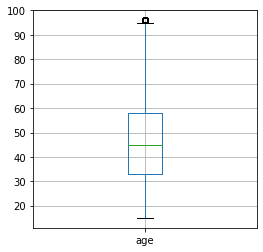

In [19]:
fraud_df.boxplot(column='age', figsize=(4, 4))

Transaction Amount:
count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64


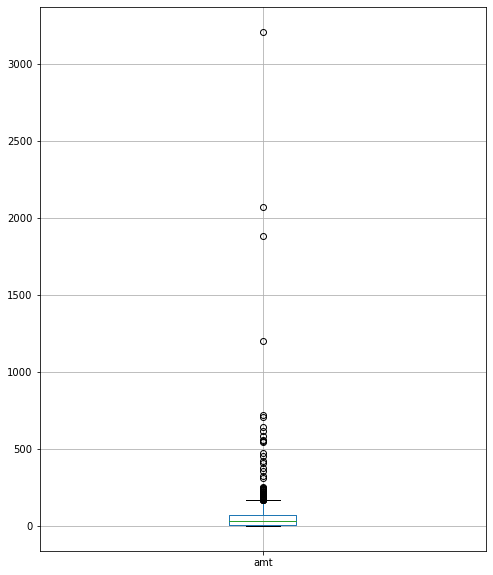

In [20]:
stats = fraud_df['amt'].describe()
print("Transaction Amount:")
print(stats)
fraud_df.head(1000).boxplot(column='amt', figsize=(8, 10))

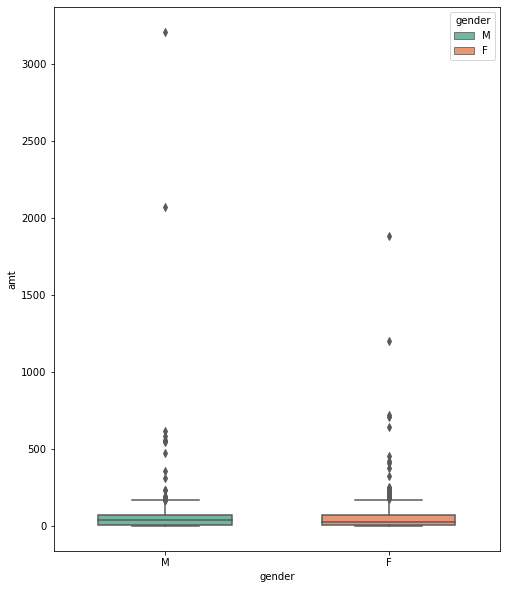

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
gender_amt = pd.DataFrame(fraud_df.head(1000), columns = ['amt', 'gender'])

plt.figure(figsize=(8,10))
sns.boxplot(y='amt', x='gender', data=gender_amt, hue='gender', dodge=False, width = 0.6, palette= 'Set2')

### EDA - Imbalance Identification

In [22]:
fraud_counts = fraud_df['is_fraud'].value_counts().sort_index().reset_index()
fraud_counts.columns = ['is_fraud','count']

# print(fraud_counts)

no_fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 0].iloc[0]['count']
fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 1].iloc[0]['count']

percent_with_fraud = "{:.2f}".format(((fraud_count / no_fraud_count) * 100))

print(f"No Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Fraud Percentage: {percent_with_fraud}%")

No Fraud Count: 1842743
Fraud Count: 9651
Fraud Percentage: 0.52%


### Data Encoding - One Hot Encoder

In [23]:
cat_col = ['category','gender']
fraud_df['Target'] = fraud_df['amt']
#This one hot encodes the categorical columns and create a new variable to hold the nex column headers
if len(cat_col)>0: 
    cat_onehotencode = pd.get_dummies(fraud_df[cat_col],drop_first = True)
    cat_col_onehotencode = list(cat_onehotencode.columns)
    fraud_df = pd.concat([fraud_df,cat_onehotencode], axis = 1)

else:
    cat_col_onehotencode = []
fraud_df[cat_col_onehotencode].head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [24]:
fraud_df.to_csv('df_cat.csv', index=False)